# Methodology

These numbers are extract from Git using a manual process, which may be partially automated. A rough outline of the process is the following steps:

1. Select a target sample date (e.g. Jan 1)
2. Select a commit that close to the target date
3. Checkout the tree and grep for "cls_register"
4. Count instances of "cls_register" for different object classes.

In [2]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
#df = pd.read_csv("data.csv", parse_dates=True, infer_datetime_format=True)
dt_parser = lambda date: pd.datetime.strptime(date, '%Y-%M-%d')
df = pd.read_csv("data.csv", parse_dates=[0], date_parser=dt_parser)
df.set_index('Date', inplace=True)

In [4]:
print df

                     Classes  Methods
Date                                 
2010-01-01 00:01:00        2        2
2011-01-01 00:01:00        3        9
2012-01-01 00:01:00        4       15
2013-01-01 00:01:00        7       71
2014-01-01 00:01:00       11       88
2015-01-01 00:01:00       12       93
2016-01-01 00:01:00       16      146


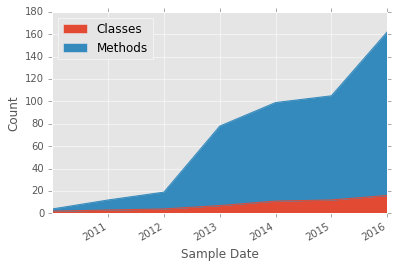

In [5]:
ax = df.plot.area()
#ax.set_title("Object Class Development")
ax.set_ylabel("Count")
ax.set_xlabel("Sample Date")
plt.savefig('output.png', dpi=300, bbox_inches='tight')